<a href="https://colab.research.google.com/github/TheAliAjami/Th_Data_Incubator_Capstone/blob/master/livestock_barn_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
import shutil
#shutil.rmtree('train')

# Upload and unzip file

In [0]:
%%capture
!unzip train.zip

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [0]:
train = pd.read_csv('train.csv')


In [21]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['id'][i], target_size=(256,256))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 236/236 [00:00<00:00, 442.73it/s]


In [0]:
y=train['label'].values
y = to_categorical(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [26]:
Model = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Train on 188 samples, validate on 48 samples
Epoch 1/20
188/188 [==============================] - 28s 151ms/step - loss: 0.7240 - acc: 0.4734 - val_loss: 0.6930 - val_acc: 0.4792
Epoch 2/20
188/188 [==============================] - 28s 147ms/step - loss: 0.6949 - acc: 0.5372 - val_loss: 0.6895 - val_acc: 0.5208
Epoch 3/20
188/188 [==============================] - 27s 146ms/step - loss: 0.6895 - acc: 0.5372 - val_loss: 0.6873 - val_acc: 0.6667
Epoch 4/20
188/188 [==============================] - 28s 147ms/step - loss: 0.6821 - acc: 0.6383 - val_loss: 0.6823 - val_acc: 0.5208
Epoch 5/20
188/188 [==============================] - 28s 147ms/step - loss: 0.6538 - acc: 0.6170 - val_loss: 0.6405 - val_acc: 0.6250
Epoch 6/20
188/188 [==============================] - 28s 147ms/step - loss: 0.6286 - acc: 0.6755 - val_loss: 0.6597 - val_acc: 0.6250
Epoch 7/20
188/188 [==============================] - 27s 146ms/step - loss: 0.6246 - acc: 0.6809 - val_loss: 0.6345 - val_acc: 0.6667
Epoch 8/20

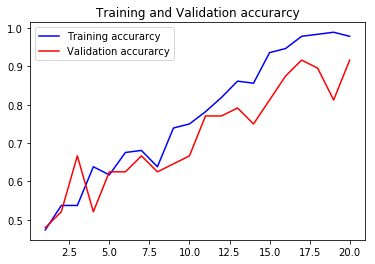

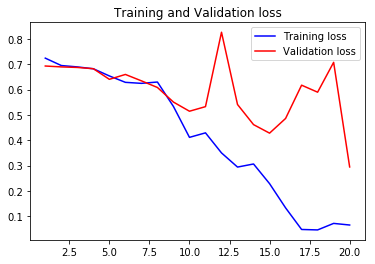

In [27]:
acc = Model.history['acc']
val_acc = Model.history['val_acc']
loss = Model.history['loss']
val_loss = Model.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [0]:
%%capture
!unzip test.zip;

In [0]:
test = pd.read_csv('test.csv')

In [39]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test/'+test['id'][i], target_size=(256,256))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test_image = np.array(test_image)
prediction = model.predict_classes(test_image)

100%|██████████| 60/60 [00:00<00:00, 271.97it/s]


In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test['label'], prediction)
print('Accuracy on test figures: %f' % accuracy)

Accuracy on test figures: 0.883333
